The following code is for Exploratory Data Analysis and modelling of the dataset which is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

Importing importing libraries and reading the csv file.

In [2]:
diab = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In EDA, we look out for missing values, NAN values, summerize the data types of each attribute and duplicated values

In [3]:
diab.shape

(768, 9)

In [4]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diab.duplicated().sum()

0

In [6]:
diab.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Data Visualization of the given dataset as well as correlation of columns with each other and the representation of related column data in a scatterplot

In [7]:
diab.corr().style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In this dataset, we don't come across any duplicate value nor missing values. This dataset is clean and ready for visualisation


In [8]:
diab.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:xlabel='Pregnancies', ylabel='BloodPressure'>

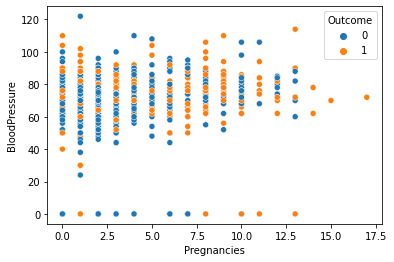

In [9]:
sns.scatterplot(data=diab, x=diab['Pregnancies'], y=diab['BloodPressure'], hue=diab['Outcome'])

<AxesSubplot:xlabel='SkinThickness', ylabel='BMI'>

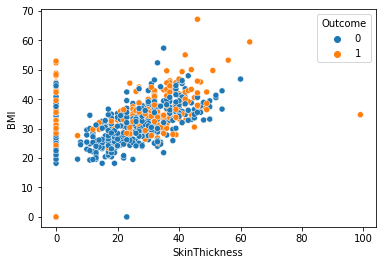

In [10]:
sns.scatterplot(data=diab, x=diab['SkinThickness'], y=diab['BMI'], hue=diab['Outcome'])

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

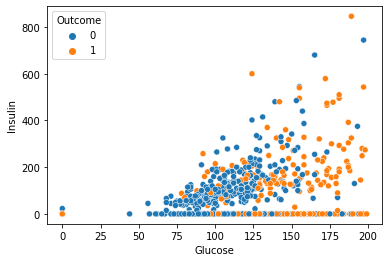

In [11]:
sns.scatterplot(data=diab, x=diab['Glucose'], y=diab['Insulin'], hue=diab['Outcome'])

<AxesSubplot:>

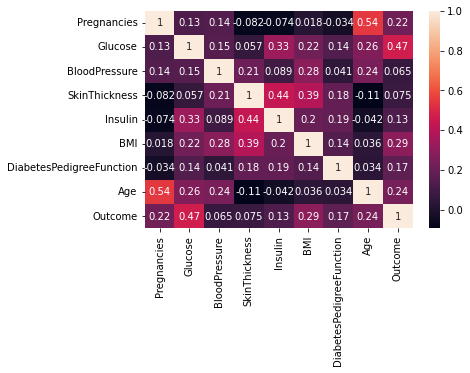

In [12]:
sns.heatmap(diab.corr(),annot=True,robust=True)

Here, I have checked the targetted column categories

In [13]:
diab['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

K-NN modelling
here, the dataset is splitted into training subset and the other variable is for targetted column

In [14]:
x = diab.drop('Outcome',axis=1)
y = diab['Outcome']

Here, we are using 'Manhattan' formula because our features are not similar.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x,y) 

In [16]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [17]:
knn = KNeighborsClassifier(n_neighbors=17, metric='manhattan')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=17)

In [18]:
y_pred_knn = knn.predict(X_test_std)
y_pred_knn

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

Here, we are passing a sample set of values to test over the trained model which was trained in the above statement on the basis of training dataset and the targetted column

In [19]:
knn_cm = confusion_matrix(y_test, y_pred_knn)
print(knn_cm)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(knn_accuracy)

[[122  16]
 [ 25  29]]
0.7864583333333334


Here, we have checked the accuracy the model.

In [20]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test_std, y_test)))

Accuracy on training set: 0.778
Accuracy on test set: 0.786


In KNN, we need to choose the number of neighbours to be considered, so the following for loop gives the accuracy of the number of neighbours specified between given digits.

In [21]:
# this loop will tell us which k value is giving us best accuracy.
scores = []
for k in range(1,30):
    knn = KNeighborsClassifier(k).fit(x, y)
    scores.append(knn.score(x, y))

print(scores, end = " ")

[1.0, 0.8385416666666666, 0.859375, 0.8138020833333334, 0.8033854166666666, 0.7825520833333334, 0.7838541666666666, 0.78515625, 0.7877604166666666, 0.77734375, 0.7864583333333334, 0.7721354166666666, 0.7838541666666666, 0.7799479166666666, 0.7903645833333334, 0.7760416666666666, 0.7838541666666666, 0.7825520833333334, 0.7903645833333334, 0.7877604166666666, 0.7903645833333334, 0.78515625, 0.7864583333333334, 0.7825520833333334, 0.7747395833333334, 0.7786458333333334, 0.77734375, 0.7682291666666666, 0.7682291666666666] 

The following graphs is of the scores, so looking at the graph, we consider the point from where the graphline has started declining, i.e. 3

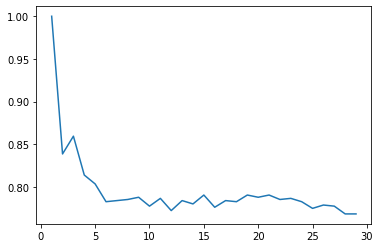

In [22]:
plt.plot(np.arange(1,30), scores);

Now, with the assured assumptions, we train the final model using manhattan tech

Now using SVM, we have predicted the outcome.
Here, we have splitted the dataset into training data and the targetted column

In [23]:
x_1 = diab.drop('Outcome',axis=1)
y_1 = diab['Outcome']

In [24]:
x_1.shape, y_1.shape

((768, 8), (768,))

As we are using SVM model, we split the training dataset into small parts, one part for training and one part for testing the model.

In [25]:
# dividing our data
X_train, X_test, y_train, y_test = train_test_split(x_1,y_1) 

In [26]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [27]:
svc = SVC(C=0.9) # No hyperparameter given means it will use default values (i.e. - C = 1.0 and kernel = 'rbf')
svc.fit(X_train_std, y_train)

SVC(C=0.9)

The accuracy of the model is shown below

In [28]:
y_pred_svc = svc.predict(X_test_std)
y_pred_svc

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [29]:
svc_cm = confusion_matrix(y_test, y_pred_svc)
print(svc_cm)
svc_accuracy = accuracy_score(y_test, y_pred_svc)
print(svc_accuracy)

[[114  13]
 [ 26  39]]
0.796875


In [30]:
print("Accuracy on training set: {:.3f}".format(svc.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_std, y_test)))

Accuracy on training set: 0.823
Accuracy on test set: 0.797


We can see that KNN gives more accuracy than the SVM.

Comparing Accuracy for KNN and SVM algorithms

In [31]:
algorithms=['KNN','SVM']
scores=[knn_accuracy,svc_accuracy]

<BarContainer object of 2 artists>

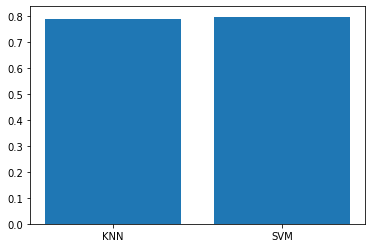

In [32]:
# sns.set(rc={'figure.figsize':(10,5)})
# sns.l(x=algorithms,y=scores)
plt.bar(algorithms, scores)
